<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/GMM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Segmentation:
In today's lecture, we'll try to segment customers based on 'Wholesale Customers Data'.

Q. What is meant by customer segmentation?

Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviours, so you can market to those customers more effectively.

Almost all the companies in today's world, one way or other, make use of customer segmentation for marketing.

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [2]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 34.9MB/s]


Before jumping in, let's first understand and import the data, and try to visualize it on a plot.

#### **Dataset - Wholesale Customers Data**

The dataset used for this case study contains the following parameters:

1. **Fresh:** annual spending (some monetary unit) on fresh products (Continuous);
2. **Milk:** annual spending (some monetary unit) on milk products (Continuous);
3. **Grocery:** annual spending (some monetary unit) on grocery products (Continuous);
4. **Frozen:** annual spending (some m.u.) on frozen products (Continuous)
5. **Detergentss_Paper:** annual spending (some m.u.) on detergents and paper products (Continuous)
6. **Delicassen:** annual spending (some m.u.) on and delicatessen products (Continuous);
7. **Channel:** customers Channel - (Two possible values: Horeca (Hotel/Restaurant/Cafe) or Retail channel) (Nominal)
8. **Region:** customers Region (Three possible values: Lisnon, Oporto or Other) (Nominal)

In [3]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.

In [4]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

#### **Visualizing the data in 2D**

Using 2 features:

1. **Grocery:** The customer’s annual spending (in some monetary unit) on grocery products.
2. **Milk:** The customer’s annual spending (in some monetary unit) on milk products.

#### Let's plot two features data now:

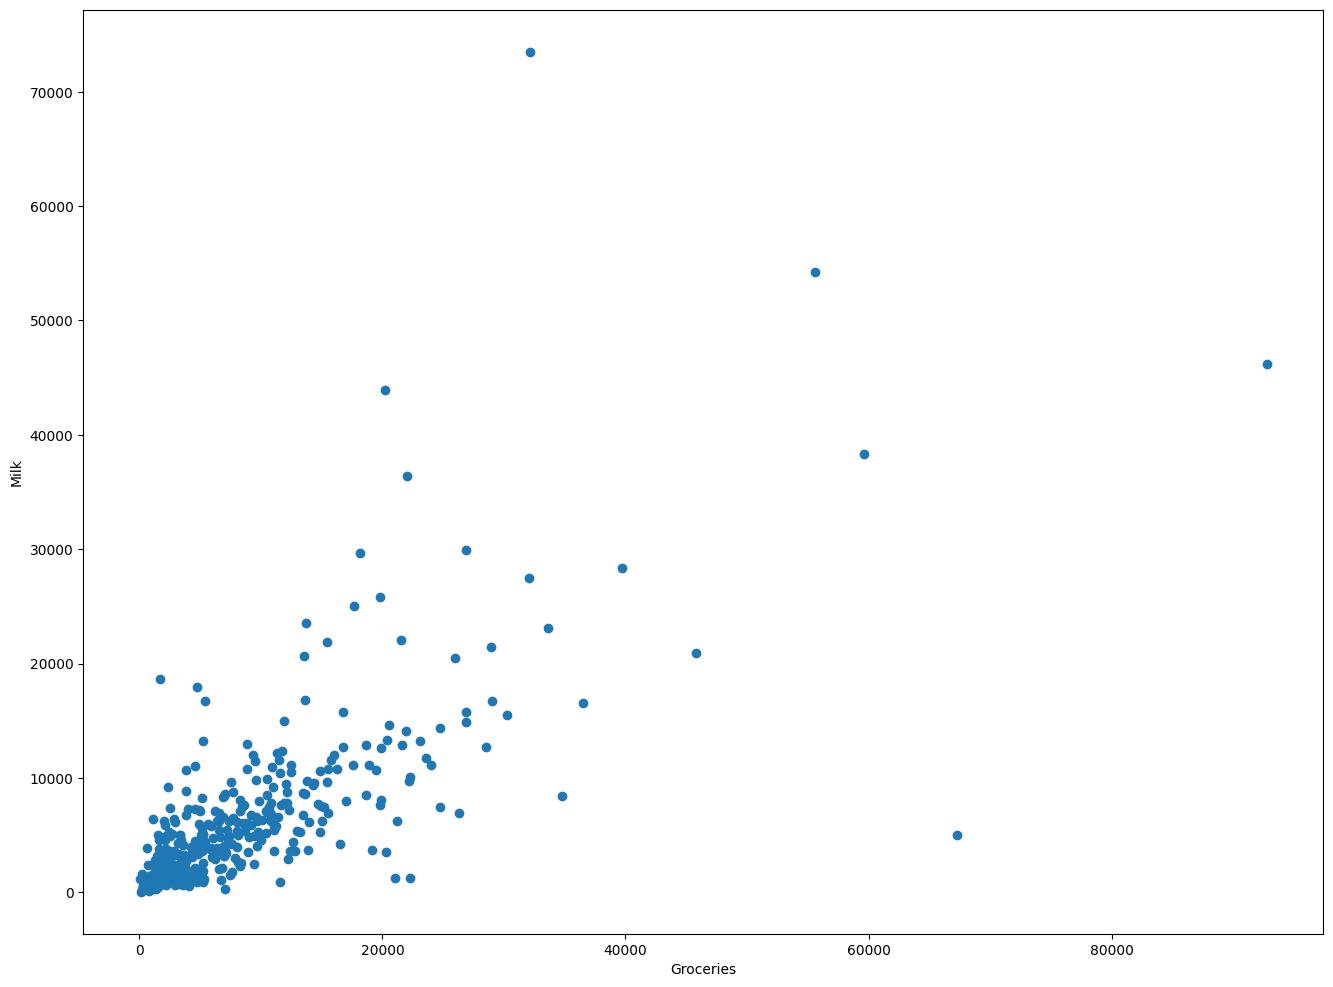

In [5]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

### Let's Standardised the data with just these two features

In [6]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

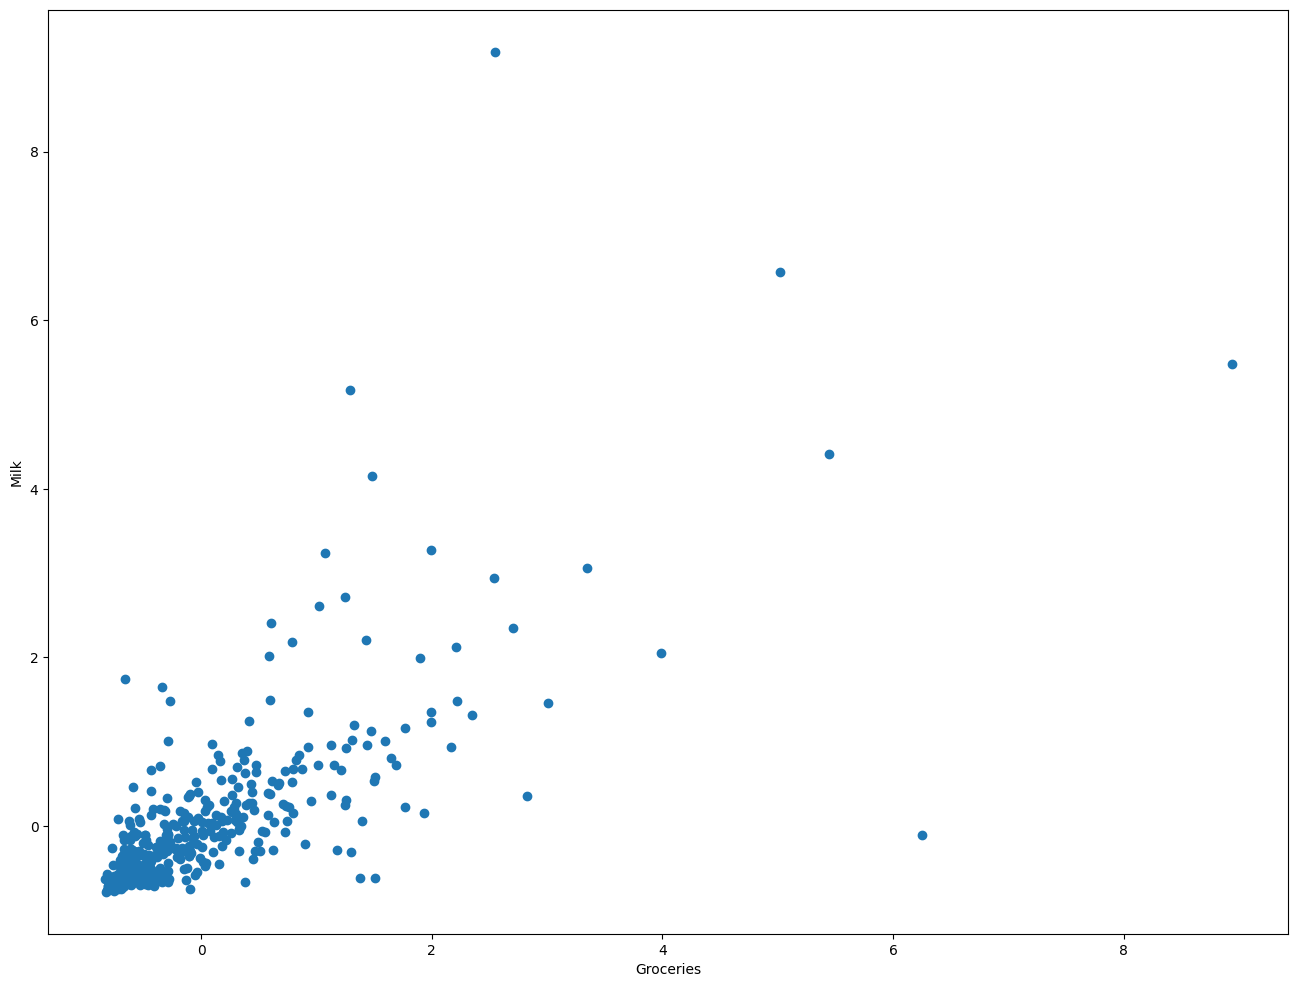

In [7]:
plt.scatter(std_df[:, 0], std_df[:, 1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(std_df)
labels = gmm.predict(std_df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

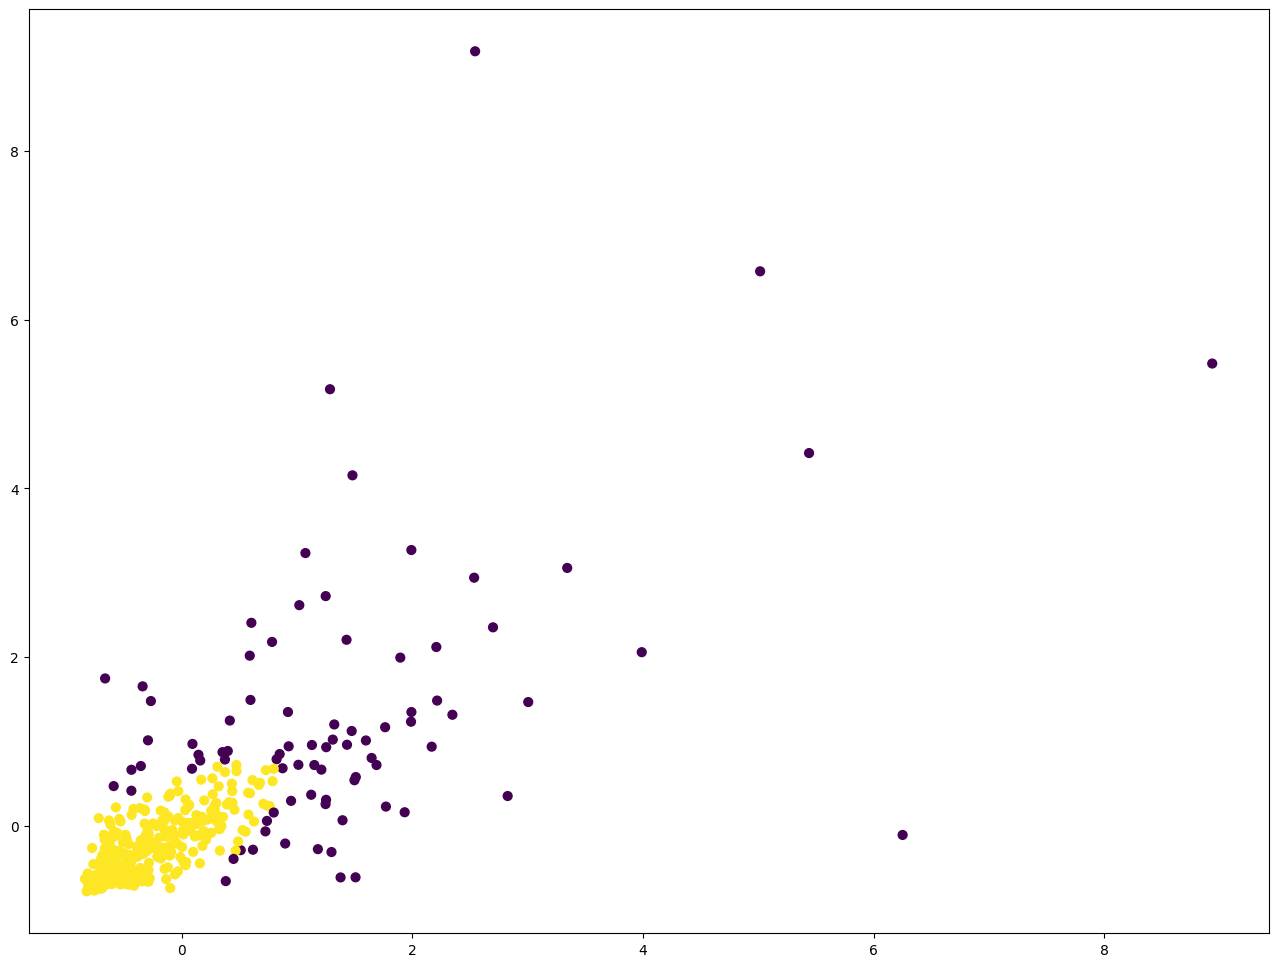

In [9]:
plt.scatter(std_df[:, 0], std_df[:, 1], c=labels, s=40, cmap='viridis');

In [10]:
gmm.predict_proba(std_df)[:5]

array([[0.31783243, 0.68216757],
       [0.18209388, 0.81790612],
       [0.10979272, 0.89020728],
       [0.00941463, 0.99058537],
       [0.00897087, 0.99102913]])

In [11]:
random_point = np.array([[1,0.8]])

gmm.predict_proba(random_point).round(2)

array([[0.81, 0.19]])

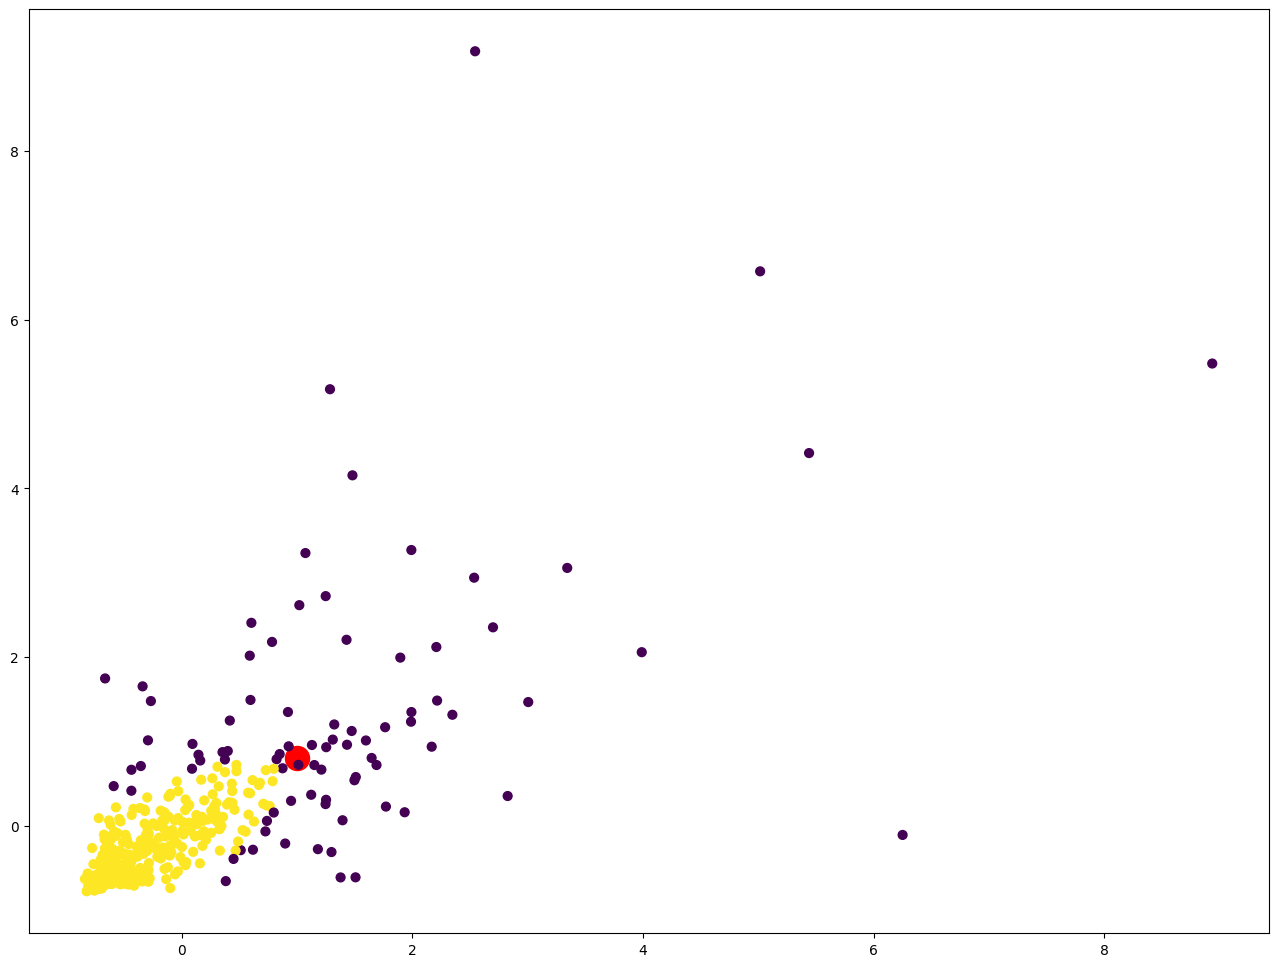

In [12]:
rand_label = gmm.predict(random_point)
plt.scatter(random_point[:,0], random_point[:,1], color="red", s=300);
plt.scatter(std_df[:, 0], std_df[:, 1], c=labels, s=40, cmap='viridis');